## ABADEJOS, Jason
## MAGPALE, Nicolle
## RECCION, Mavic
## ADVSTAT S18


# Central Limit Theorem

The Central Limit Theorem states that when a large number of random samples is taken from any dataset, the sampling distribution of the dataset means will approach a normal distribution with a distribution mean equal to the population mean, and a distribution variance equal to $\sigma^2_\bar{x} = \frac{\sigma^2_X}{n}$.

In [49]:
#IMPORTS

%matplotlib inline
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

#set font size of plots to 22
matplotlib.rcParams.update({"font.size":22})

## Planned workflow

To prove the Central Limit Theorem, we must first generate the data to be used, then find the sampling distributions for the dataset, 

To do:

1) Check numpy for function calls for different preset data distributions.

2) Create data distributed in a uniform distribution from 0 to 1.

3) Create data distributed in a beta distribution with a = 3 and b = 5.

4) Create data distributed in a beta distribution with a = 5 and b = 3.

In [50]:
#DATASET GENERATION

# n = the number of values in the dataset to be generated
n = 100000

######################
# Put Your Code Here #
######################

lowerBound = 0
upperBound = 1
uniform_data = np.random.uniform(lowerBound, upperBound, n)
beta1_data = np.random.beta(3, 5, n)
beta2_data = np.random.beta(5, 3, n)

##################
#      End       #
##################
beta1_data

array([ 0.5146406 ,  0.51255564,  0.61506625, ...,  0.49313217,
        0.27516479,  0.58426985])

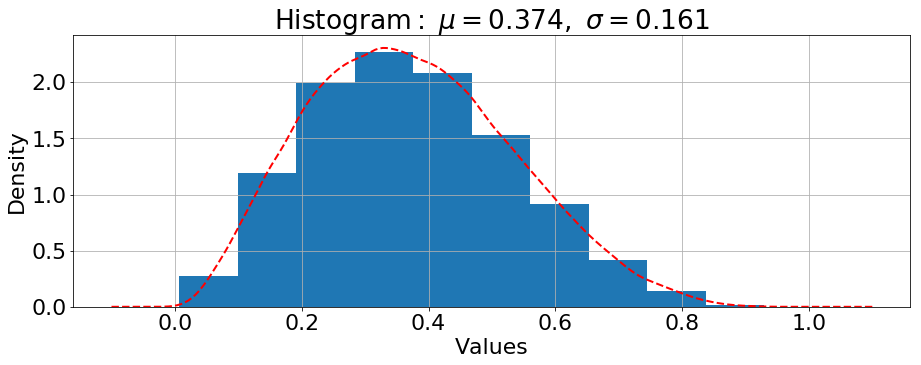

In [51]:
# HISTOGRAM VISUALIZATION - UNIFORM

# change this data variable to the appropriate dataset
data = beta1_data
a = lowerBound
b = upperBound

#visualize the histogram of the data
fig = plt.figure(figsize=(15,5))
num, bins, patches = plt.hist(data, 10,normed=True)

mean = np.mean(data)
stdev = np.std(data)

#add a line corresponding to the probability density function
density = gaussian_kde(data)
xs = np.linspace(a-0.1,b+0.1,200)
plt.plot(xs, density(xs), 'r--',linewidth=2)

#plot labels
plt.xlabel('Values')
plt.ylabel('Density')
plt.title(r'$\mathrm{Histogram:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, stdev))
plt.grid(True)


plt.show()

## Sanity Check 1:

#### What does the uniform distribution look like?
The expected outcome of uniform distribution is that it has a constant probability, which makes the histogram look like a rectangular block.

#### What does data generated from the uniform distribution look like?
Since the dataset is randomly generated the values (actual probabilities) slightly vary from the expected outcome (constant probability). There are some values that are slighty lower or higher than the others, but all of them are close to it.


In [52]:
# SAMPLING FROM THE DATA
sample_size = 10
number_of_samples = 1000

######################
# Put Your Code Here #
######################
# TODO:
# 1) Take n=number_of_samples samples of size=sample_size from the generated dataset.
# 2) Populate the samples list with the data taken.

samples = []
for i in range(number_of_samples):
    samples.append(list(np.random.choice(data, size=sample_size)))

##################
#      End       #
##################
samples = np.array(samples)
samples

array([[ 0.69486338,  0.54864788,  0.52348001, ...,  0.29337267,
         0.37094814,  0.69169259],
       [ 0.05834319,  0.27241407,  0.48688519, ...,  0.2703951 ,
         0.22366379,  0.6301791 ],
       [ 0.42244767,  0.22013529,  0.36630064, ...,  0.21357513,
         0.50293583,  0.44703992],
       ..., 
       [ 0.27629993,  0.63746019,  0.49183546, ...,  0.35948383,
         0.40950522,  0.52912879],
       [ 0.07085468,  0.51782362,  0.28060734, ...,  0.34498016,
         0.25422011,  0.13362955],
       [ 0.303804  ,  0.54657513,  0.52619039, ...,  0.3128996 ,
         0.3334399 ,  0.33408549]])

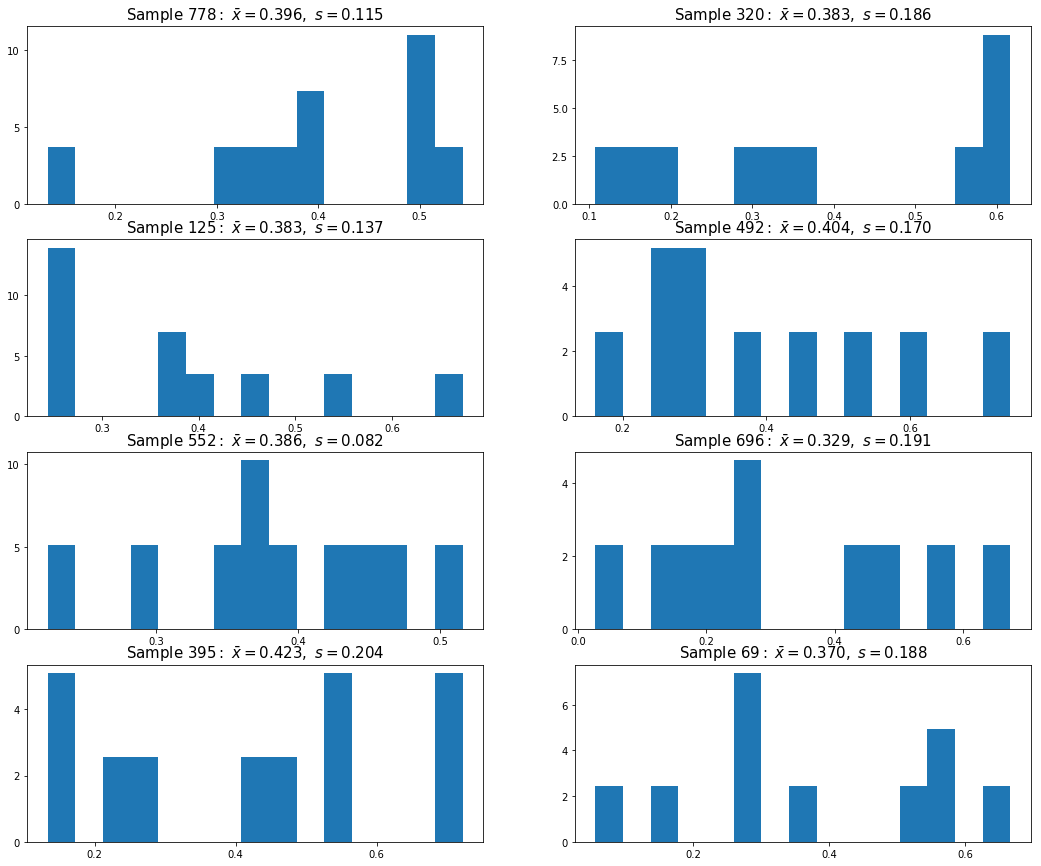

In [53]:
# PLOTTING A RANDOM 8 SAMPLES
# You can rerun this code for a different set of 8 samples from your dataset.

fig = plt.figure(figsize=(18,15))
ctr = 1

for i in np.random.choice(np.arange(number_of_samples),8):
    ax = plt.subplot(4,2,ctr)
    for j in (ax.get_xticklabels() + ax.get_yticklabels()):
        j.set_fontsize(10)
        
    
    plt.hist(samples[i,:], 15,normed=True)
    plt.title(r'$\mathrm{Sample\ %d:}\ \bar{x}=%.3f,\ s=%.3f$' %(i,np.mean(samples[i,:]), np.std(samples[i,:])))
    ax.title.set_fontsize(15)
    ctr = ctr + 1

In [58]:
# FINDING THE SAMPLING DISTRIBUTIION OF THE MEANS

######################
# Put Your Code Here #
######################
# TODO:
# 1) Create an array with the means of all the samples.
# 2) Find the mean and stdev of the sampling distribution array.

sample_means = []

for s in samples:
    sample_means.append(np.mean(s))
    
sample_ave = np.mean(sample_means)
sample_stdev = np.std(sample_means)

##################
#      End       #
##################
sample_stdev

0.016240967350846739

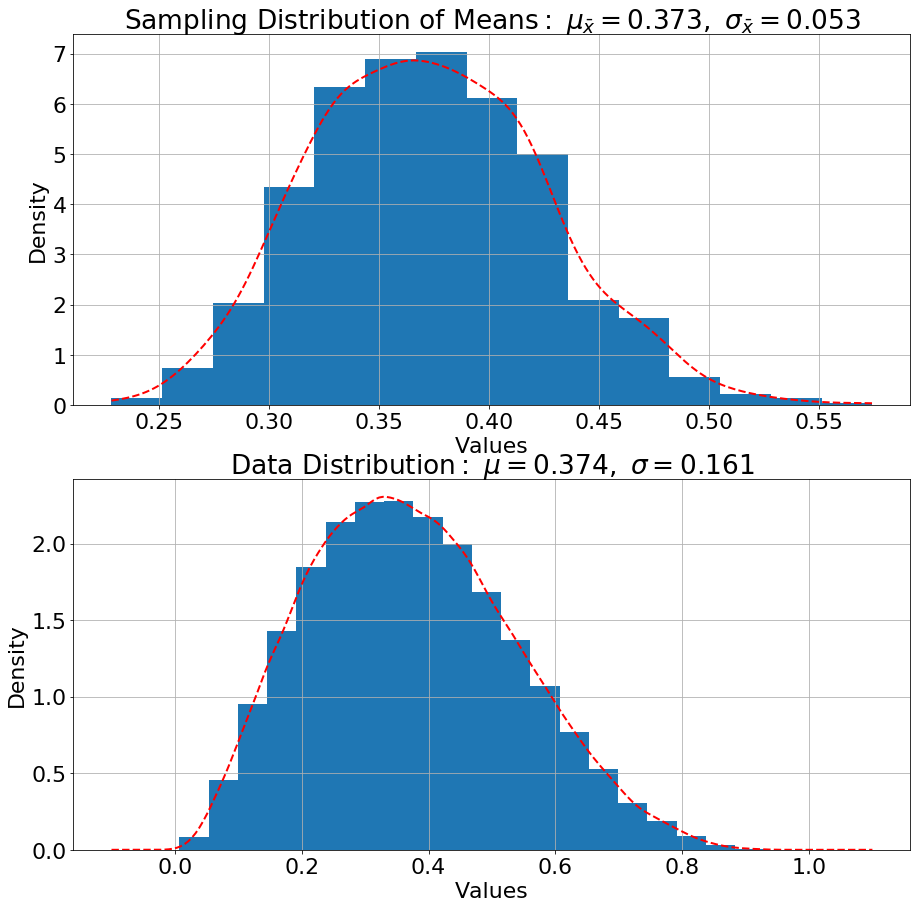

In [55]:
# PLOTTING THE SAMPLING DISTRIBUTION

fig = plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
n, bins, patches = plt.hist(sample_means, 15, normed=1)

sample_density = gaussian_kde(sample_means)
xs = np.linspace(np.min(sample_means),np.max(sample_means),200)

plt.plot(xs, sample_density(xs), 'r--',linewidth=2)

mu = sample_ave
sigma = sample_stdev

plt.xlabel('Values')
plt.ylabel('Density')
plt.grid(True)
plt.title(r'$\mathrm{Sampling\ Distribution\ of\ Means:}\ \mu_\bar{x}=%.3f,\ \sigma_\bar{x}=%.3f$' %(mu, sigma))

plt.subplot(2,1,2)
num, bins, patches = plt.hist(data, 20,normed=True)
xs = np.linspace(a-0.1,b+0.1,200)
plt.plot(xs, density(xs), 'r--',linewidth=2)

#plot labels
plt.xlabel('Values')
plt.ylabel('Density')
plt.title(r'$\mathrm{Data\ Distribution:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, stdev))
plt.grid(True)


## Central Limit Theorem Simulation

To simulate the Central Limit Theorem,

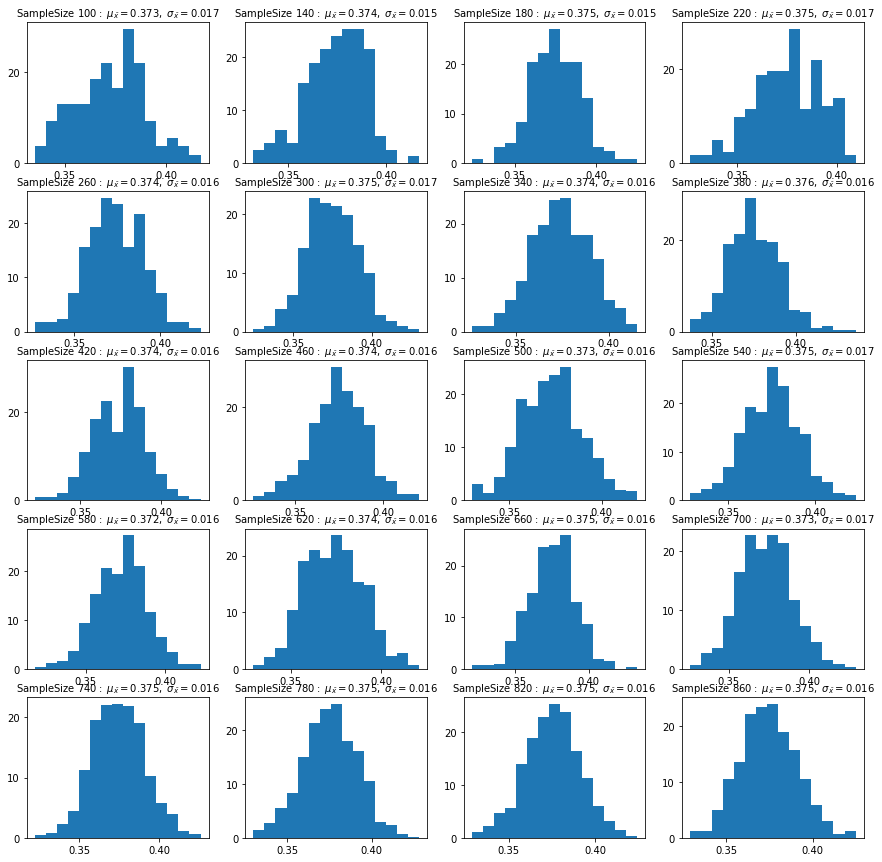

In [57]:
# CENTRAL LIMIT THEOREM SIMULATION

sample_size = 100
ctr = 1

fig = plt.figure(figsize=(15,15))

# For a range of a number of samples starting from 100 to 900, repeat the sampling means process:
for number_of_samples in range(100,900,40):

    ######################
    # Put Your Code Here #
    ######################
    # TODO:
    # 1) Fill the samples array.
    # 2) Get sample_means, the sampling distribution mean, and sampling distribution stdev.
    
    samples = []
    for i in range(number_of_samples):
        samples.append(list(np.random.choice(data, size=sample_size)))
    
    sample_means = []
    for s in samples:
        sample_means.append(np.mean(s))

    sample_ave = np.mean(sample_means)
    sample_stdev = np.std(sample_means)
    sample_var = sample_stdev ** 2
    print()

    ##################
    #      End       #
    ##################
    
    # Plotting code:
    ax = plt.subplot(5,4,ctr)
    for j in (ax.get_xticklabels() + ax.get_yticklabels()):
        j.set_fontsize(10)

    plt.hist(sample_means, 15,normed=True)
    plt.title(r'$\mathrm{Sample Size\ %d:}\ \mu_\bar{x}=%.3f,\ \sigma_\bar{x}=%.3f$' %(number_of_samples,sample_ave,sample_stdev))
    ax.title.set_fontsize(10)
        
    ctr += 1

# Sanity Check:

Warning: Depending on the computer running the code, the final simulation may take a bit of time (5-10min) to complete. 

#### Given the plotted graphs above, compare the first row of plots with the last row. Is there a difference? What are the main differences between the plots?
The first row has no noticeable patterns. There are several modes or peaks. Meanwhile the last has a more defined bell shape. As the sample size increases, the narrower the bell-shaped curve becomes.


#### Does this prove or disprove the Central Limit Theorem? How?
Yes. As the sample size gets larger (the more the sample approaches the population), the more the graph looks a bell-shaped graph, the more it looks like a normal distribution. Furthermore, as the bell-shaped curve becomes narrower, the standard deviation as well as the variance get smaller. Thus, this proves the CLT.


## Checking with more datasets

Go back up to the top and attempt to run the same sampling for a diffferent dataset, and record the results for the sampling distribution mean, sampling distribution variance, and the shape of the sampling distribution.

Try other datasets too! Try to find a dataset for which the Central Limit Theorem does not apply.

## Analysis
#### 1) CLT works on all datasets (e.g. uniform, beta1, and beta2). 
#### 2) Sample mean approaches the population mean as the sample size increases.
#### 3) A larger sample size will produce a smaller sampling distribution variance. The sample variance approaches the population variance as the sample size increases. 